IMPORTING LIBRARIES

In [41]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

DATASET - MNIST Fashion Dataset ( consists 60,000 images for training and 10,000 images for testing )

In [42]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [43]:
train_images.shape

(60000, 28, 28)

In [44]:
train_labels.shape

(60000,)

In [45]:
test_images.shape

(10000, 28, 28)

In [46]:
test_labels.shape

(10000,)

In [47]:
train_images[0,23,23]

194

In [48]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

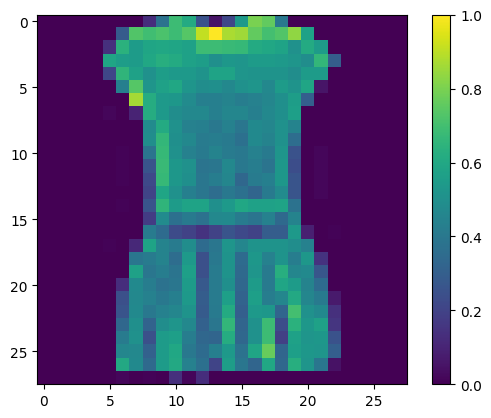

In [63]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

DATA PREPROCESSING

In [50]:
train_images=train_images/255.0
test_images=test_images/255.0

MODEL BUILDING

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

MODEL COMPILE

In [52]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

MODEL TRAINING

In [53]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4946 - accuracy: 0.8259
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3686 - accuracy: 0.8671
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3327 - accuracy: 0.8776
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3107 - accuracy: 0.8862
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2918 - accuracy: 0.8933
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2776 - accuracy: 0.8978
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2655 - accuracy: 0.9021
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2565 - accuracy: 0.9052


MODEL EVALUATION

In [54]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8692
Test accuracy: 0.8691999912261963


MAKING PREDICTIONS

In [55]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 1ms/step


array([1.0694507e-05, 1.6518450e-05, 2.3694861e-06, 1.8940185e-06,
       2.3452097e-07, 6.3473419e-03, 6.5416280e-05, 7.6166362e-02,
       4.9356811e-07, 9.1738862e-01], dtype=float32)

FINDING THE MOST-LIKELIHOOD LABEL

In [56]:
np.argmax(predictions[0])

9

TO VERIFY

In [57]:
test_labels[0]

9

1/1 [==============================] - 0s 17ms/step


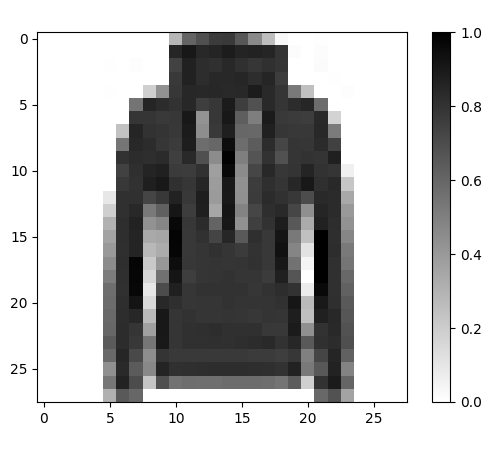

In [66]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
